In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [10]:
def plot_image(image_1,image_2,title_1="Original",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1,cmap='gray')
    plt.title(title_1)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,2)
    plt.imshow(image_2,cmap='gray')
    plt.title(title_2)
    plt.show()

the next function will plot two histogram side by side

In [15]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use cv.calcHist() to generate the histogram. Here are the parameter values:

cv2.calcHist(CV array:[image] this is the image channel:[0],for this course it will always be [None],the number of bins:[L],the range of index of bins:[0,L-1]) 

Toy Example
Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.

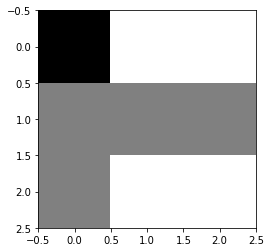

toy image:  [[0 2 2]
 [1 1 1]
 [1 2 2]]


In [5]:
toy_image=np.array([[0,2,2],[1,1,1],[1,2,2]],dtype=np.uint8)
plt.imshow(toy_image,cmap='gray')
plt.show()
print("toy image: ",toy_image)

We can use the caclHist function, in this case, we use only three bins as there are only three values, and the index of the bins are from 1 to 3.

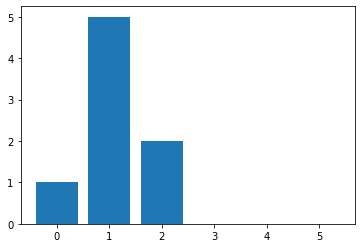

In [6]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

Gray Scale Histograms¶
Histograms are used in grayscale images. Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following "Gold Hill" image:

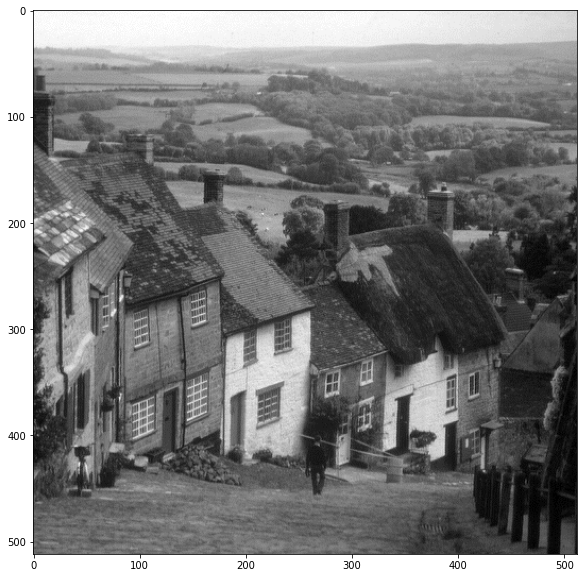

In [7]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

We can calculate the histogram using the calcHist function from the cv2 module as follows, the shape is 256.

In [13]:
hist=cv2.calcHist([goldhill],[0],None,[256],[0,256])

We can plot it as a bar graph, the  𝑥 -axis are the pixel intensities and the  𝑦 -axis is the number of times of occurrences that the corresponding pixel intensity value on  𝑥 -axis occurred.

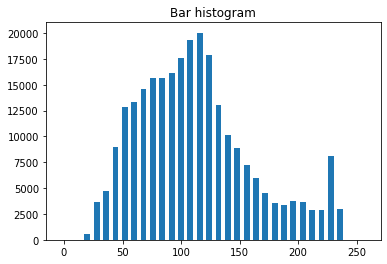

In [14]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

We can convert it to a probability mass function by normalizing it by the number of pixels:


In [15]:
pmf=hist/(goldhill.shape[0]*goldhill.shape[1])

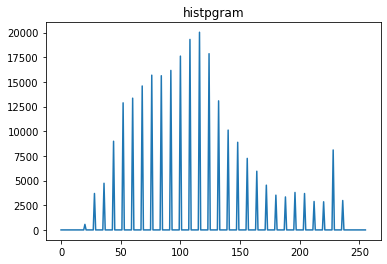

In [16]:
plt.plot(intensity_values,hist)
plt.title("histpgram")
plt.show()

We can also apply a histogram to each image color channel:

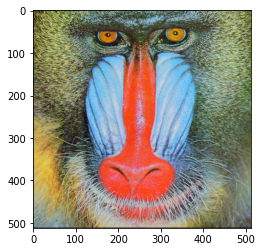

In [17]:
baboon=cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

In the loop, the value for i specifies what color channel calcHist is going to calculate the histogram for.

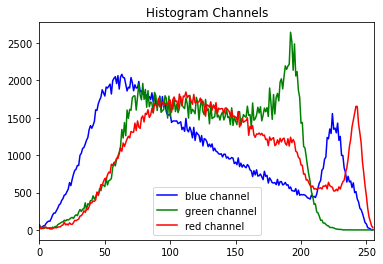

In [18]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

Intensity Transformations
It's helpful to think of an image as a function  𝑓(𝑥,𝑦)  instead of an array at this point, where x is the row index and y is the column index. You can apply a transformation  𝑇  to the image and get a new image:
𝑔(𝑥,𝑦)=𝑇(𝑓(𝑥,𝑦))
 
An Intensity Transformation depends on only one single point  (𝑥,𝑦) . For example, you can apply a linear transform  𝑔(𝑥,𝑦)=2𝑓(𝑥,𝑦)+1 ; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if  𝑟  is the gray level intensity, similar to the histogram values. The new output s is given by:

𝑠=𝑇(𝑟)

Image Negatives
Consider an image with  𝐿  intensity values ranging from  \[0,𝐿−1] . We can reverse the intensity levels by applying the following:
𝑔(𝑥,𝑦)=𝐿−1−𝑓(𝑥,𝑦)
 
Using the intensity transformation function notation
𝑠=𝐿−1−𝑟
 
This is called the image negative. For  𝐿=256  the formulas simplifys to:
𝑔(𝑥,𝑦)=255−𝑓(𝑥,𝑦)and𝑠=255−𝑟
 
We can perform intensity transformation on the toy image where  𝐿=3 :

In [20]:
neg_toy_image=-1*toy_image+255
print("toy_image: ",neg_toy_image)

toy_image:  [[255 253 253]
 [254 254 254]
 [254 253 253]]


We see darker intensity’s become brighter and brighter become darker, middle intensity’s remain the same.

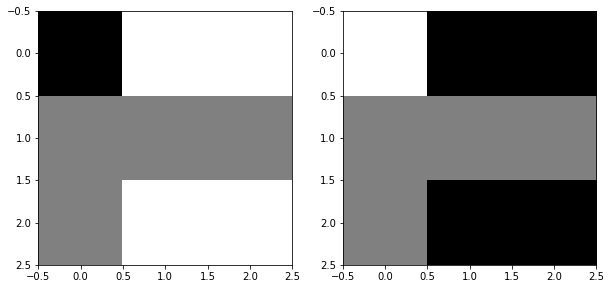

toy_image: [[0 2 2]
 [1 1 1]
 [1 2 2]]


In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

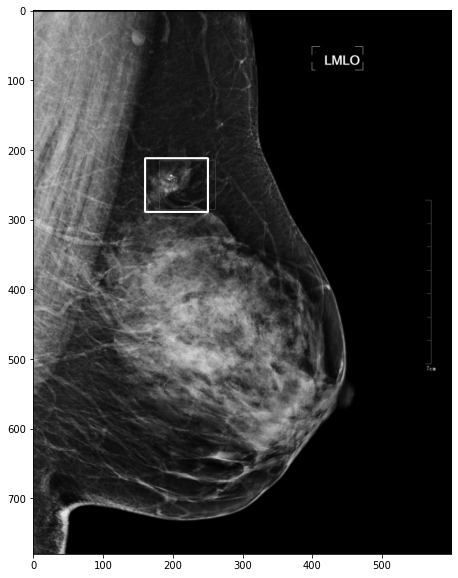

In [22]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

we can apply image negative here

In [23]:
img_neg=-1*image+255

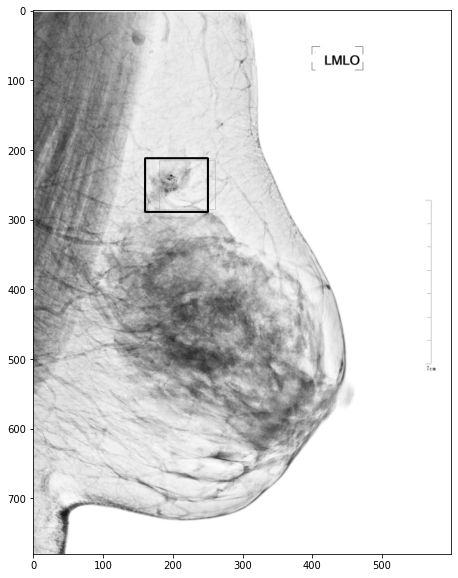

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg,cmap="gray")
plt.show()

Brightness and contrast adjustments¶
We can use multiplication by  𝛼  for contrast control and addition by  𝛽  to improve brightness control. This applies the Intensity Transformation as well. The image is  𝑓(𝑥,𝑦)  and the transformed image is  𝑔(𝑥,𝑦) , where  𝑔(𝑥,𝑦)=𝛼𝑓(𝑥,𝑦)+𝛽 .

Rather than implementing via array operations, we use the function convertScaleAbs. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between  \[0,255] . For brightness control, we can set  𝛼  to 1 and  𝛽  to 100: Remember the Good Hill image, it’s dark and hazy so let's see if we can improve it.

In [32]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

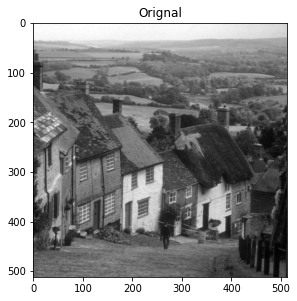

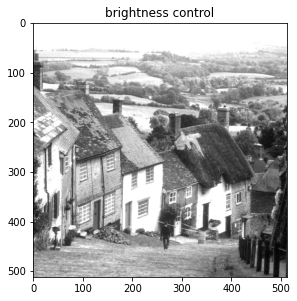

In [33]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

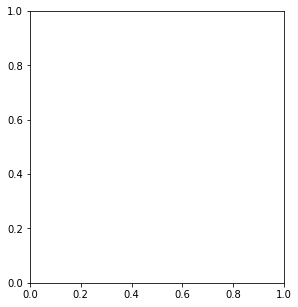

In [34]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

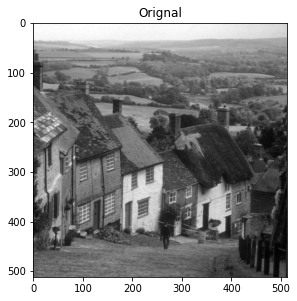

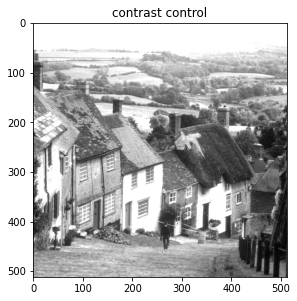

In [35]:
plot_image(goldhill,new_image,"Orignal","contrast control")

In [36]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

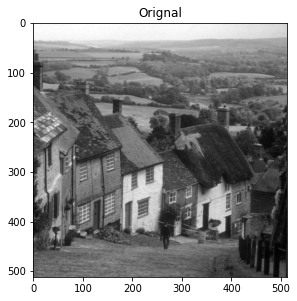

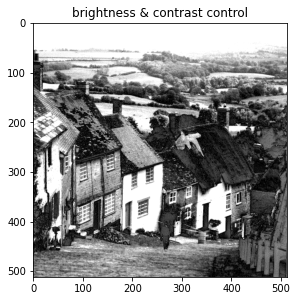

In [37]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

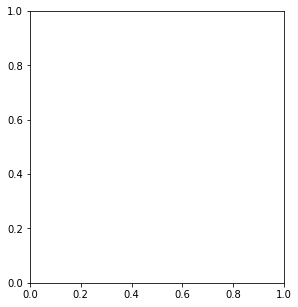

In [38]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting the histogram. We simply apply the function cv2.equalizeHist.

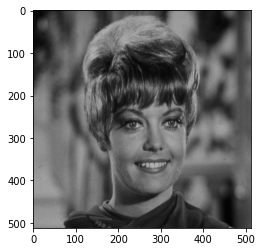

In [40]:
zelda=cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(zelda,cv2.COLOR_BGR2RGB))

In [7]:
def thresholding(input_img, threshold,max_value=255,min_value=0):
    n,m=input_img.shape
    image_out=np.zeros((n,m),dtype=np.uint8)
    for i  in range(n):
        for j in range(m):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
    return image_out

In [2]:
toy_image

NameError: name 'toy_image' is not defined

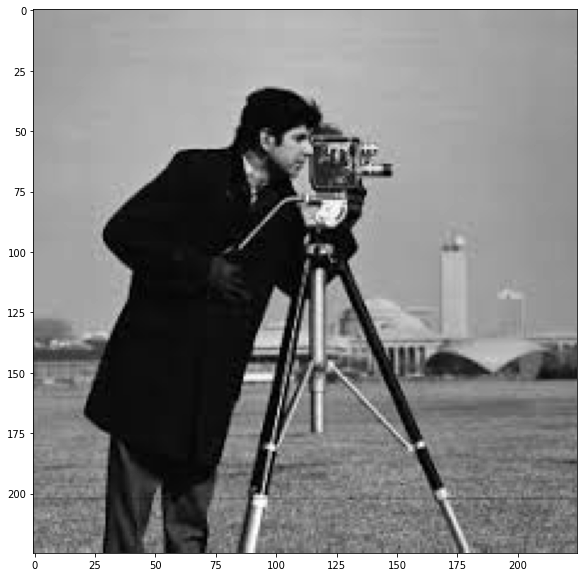

In [5]:
image=cv2.imread("cameraman.jpeg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")
plt.show()

In [8]:
threshold=87
new_image=thresholding(image,threshold)

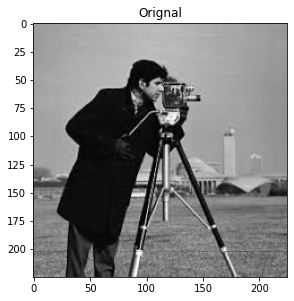

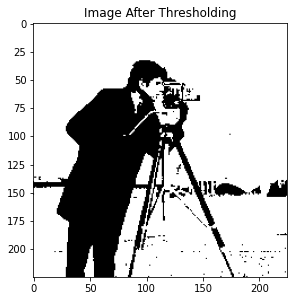

In [11]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

The function cv.threshold Applies a threshold to the gray image, with the following parameters:

cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )

The parameter thresholding type is the type of thresholding we would like to perform. For example, we have basic thresholding: cv2.THRESH_BINARY this is the type we implemented in the function thresholding, it just a number:

In [12]:
cv2.THRESH_BINARY

0

we can apply thresholding to the image as follows: 

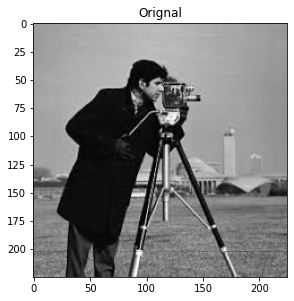

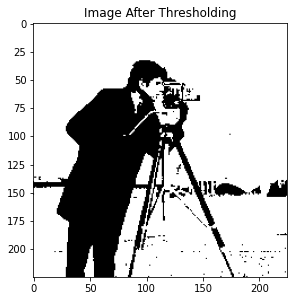

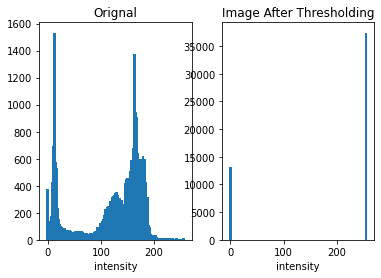

In [16]:
ret,new_image=cv2.threshold(image,threshold,255,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

ret is the threshold value and new_image is the image after thresholding has been applied. There are different threshold types, for example, cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value:

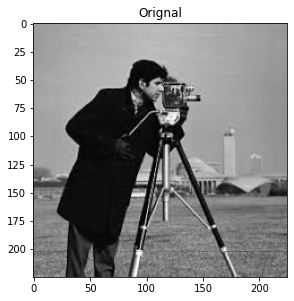

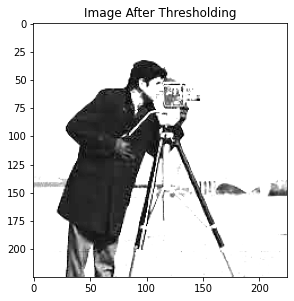

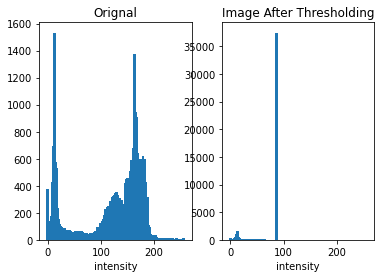

In [17]:
ret,new_image=cv2.threshold(image,threshold,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

We see that the darker elements have not changed and the lighter values are set to 255.

Otsu's method cv2.THRESH_OTSU avoids having to choose a value and determines it automatically, using the histogram.

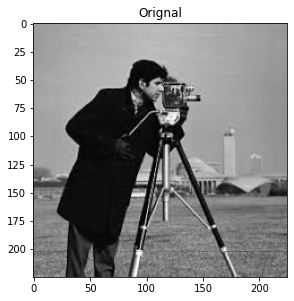

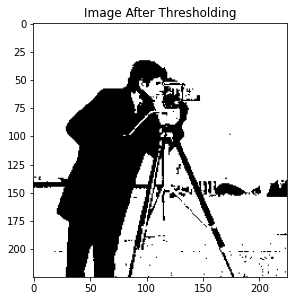

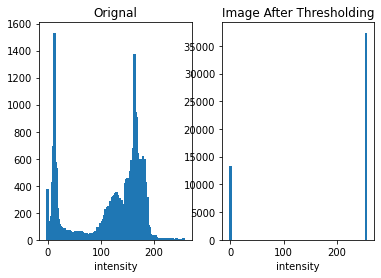

In [18]:
ret,new_image=cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")